# Task 1 - Exploration of customer purchasing behaviour


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample=pd.read_csv("sample_submission.csv")


In [3]:
sample

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [4]:
sample.shape

(41088, 2)

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [6]:
sample.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [7]:
sample.columns


Index(['Id', 'Sales'], dtype='object')

In [8]:
sample.corr()


,Id,Sales
Id,1.0,NaN
Sales,NaN,NaN


In [9]:
sample.isnull().sum()

Id       0
Sales    0
dtype: int64

In [10]:
store=pd.read_csv("store.csv")


In [11]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
store.shape

(1115, 10)

In [14]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
store.corr()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027220,-0.050319,-0.004648,0.007486,0.007584,0.039640
CompetitionDistance,-0.027220,1.000000,-0.059126,0.025124,-0.145717,-0.060552,-0.109504
CompetitionOpenSinceMonth,-0.050319,-0.059126,1.000000,-0.052250,-0.011485,-0.035504,0.047815
CompetitionOpenSinceYear,-0.004648,0.025124,-0.052250,1.000000,-0.076520,-0.079984,0.006354
Promo2,0.007486,-0.145717,-0.011485,-0.076520,1.000000,NaN,NaN
Promo2SinceWeek,0.007584,-0.060552,-0.035504,-0.079984,NaN,1.000000,-0.217650
Promo2SinceYear,0.039640,-0.109504,0.047815,0.006354,NaN,-0.217650,1.000000


In [16]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
store.drop(["CompetitionOpenSinceMonth", "Promo2SinceWeek"],  axis=1 , inplace=True)

store.dropna(inplace=True)

In [18]:
store.isnull().sum()

Store                       0
StoreType                   0
Assortment                  0
CompetitionDistance         0
CompetitionOpenSinceYear    0
Promo2                      0
Promo2SinceYear             0
PromoInterval               0
dtype: int64

In [19]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceYear
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,559.279452,4252.958904,2008.175342,1.0,2011.873973
std,327.220410,5235.906306,7.705211,0.0,1.687220
min,2.000000,40.000000,1900.000000,1.0,2009.000000
25%,276.000000,600.000000,2005.000000,1.0,2011.000000
50%,567.000000,2220.000000,2009.000000,1.0,2012.000000
75%,846.000000,5390.000000,2012.000000,1.0,2013.000000
max,1111.000000,27190.000000,2015.000000,1.0,2015.000000


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train=pd.read_csv('train.csv')


C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_13364\3039653230.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('train.csv')


In [22]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [23]:
train.shape

(1017209, 9)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [25]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
train.describe(include="object")

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2015-07-31,0
freq,1115,855087


In [27]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [28]:
test=pd.read_csv('test.csv')


In [29]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [30]:
test.shape

(41088, 8)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [32]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [33]:
test.describe(include="object")

,Date,StateHoliday
count,41088,41088
unique,48,2
top,2015-09-17,0
freq,856,40908


In [34]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [35]:
test.drop(columns="Open",inplace=True)

In [36]:
test.dropna(inplace=True)

In [37]:
test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_13364\2489435401.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


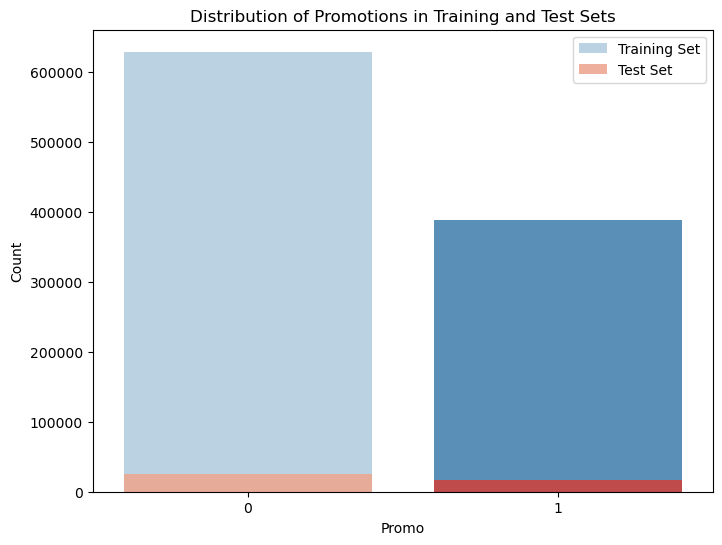

In [38]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check the distribution of promotions in the training set
train_promo_counts = train['Promo'].value_counts()

# Check the distribution of promotions in the test set
test_promo_counts = test['Promo'].value_counts()

# Create a bar plot to visualize the distribution of promotions in both datasets
plt.figure(figsize=(8, 6))
sns.barplot(x=train_promo_counts.index, y=train_promo_counts.values, palette='Blues', alpha=0.9, label='Training Set')
sns.barplot(x=test_promo_counts.index, y=test_promo_counts.values, palette='Reds', alpha=0.9, label='Test Set')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.legend()
plt.show()

# Check & compare sales behavior before, during and after holidays


In [39]:
# Check unique values in the 'StateHoliday' column to identify holiday indicators
print(train['StateHoliday'].unique())

print(train['SchoolHoliday'].unique())

['0' 'a' 'b' 'c' 0]
[1 0]


In [40]:
train['Holiday'] = train['SchoolHoliday'].apply(lambda x: 1 if x != '0' else 0)
train['Holiday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [41]:
# Sales before holiday, during holiday, and after holidays
before_holiday_sales = train[train['Holiday'] == 0]['Sales']
during_holiday_sales = train[train['Holiday'] == 1]['Sales']
after_holiday_sales = train[train['Holiday'].shift(-1) == 1]['Sales']  

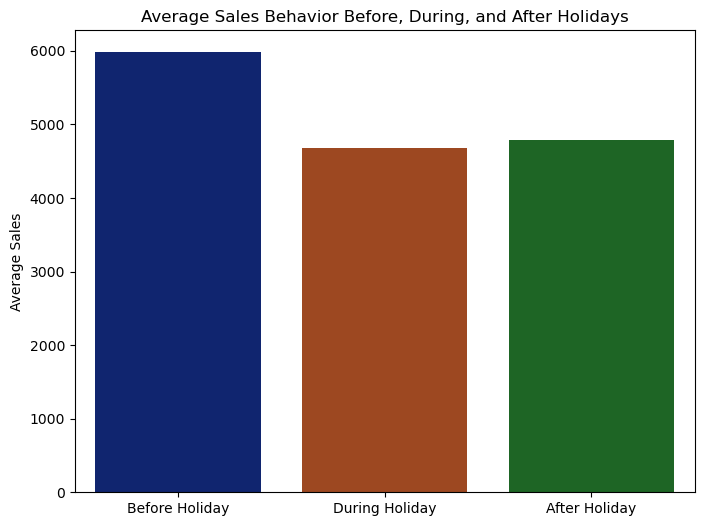

In [42]:
# Calculate the average sales 
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()
# Bar Plot to visualise the average sales behavior before, during, and after holidays 
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='dark')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()


# Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [43]:
# Define functions to identify each occasion
def is_christmas(date):
    return date.month == 12 and date.day == 25

def is_easter(date):
    return date.month == 4 and date.day == 9

def is_labour_day(date):
    return date.month == 5 and date.day == 1

def is_good_friday(date):
    return date.month == 4 and date.day == 7



In [44]:
# Convert the 'Date' column to pandas datetime type 
train['Date'] = pd.to_datetime(train['Date'])

# Create new columns to indicate each occasion
train['Christmas'] = train['Date'].apply(lambda x: 1 if is_christmas(x) else 0)
train['Easter'] = train['Date'].apply(lambda x: 1 if is_easter(x) else 0)
train['Labour Day'] = train['Date'].apply(lambda x: 1 if is_labour_day(x) else 0)
train['Good Friday'] = train['Date'].apply(lambda x: 1 if is_good_friday(x) else 0)


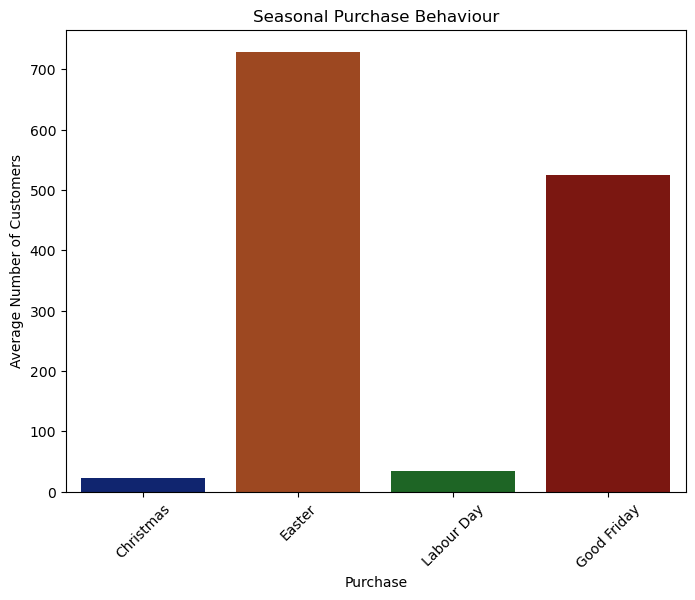

In [45]:
# Group the data by each occasion to calculate the average number of customers for each holiday
average_customers_christmas = train.groupby('Christmas')['Customers'].mean()
average_customers_easter = train.groupby('Easter')['Customers'].mean()
average_customers_labour_day = train.groupby('Labour Day')['Customers'].mean()
average_customers_good_friday = train.groupby('Good Friday')['Customers'].mean()

# Create a bar plot for all purchase on the same plot 
plt.figure(figsize=(8, 6))
sns.barplot(x=['Christmas', 'Easter', 'Labour Day', 'Good Friday'],
            y=[average_customers_christmas[1], average_customers_easter[1], average_customers_labour_day[1], average_customers_good_friday[1]],
            palette ='dark')
plt.title('Seasonal Purchase Behaviour')
plt.xlabel('Purchase')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()


# What can you say about the correlation between sales and number of customers?


In [46]:
# Calculate the correlation coefficient between 'Sales' and 'Customers'
correlation = train['Sales'].corr(train['Customers'])


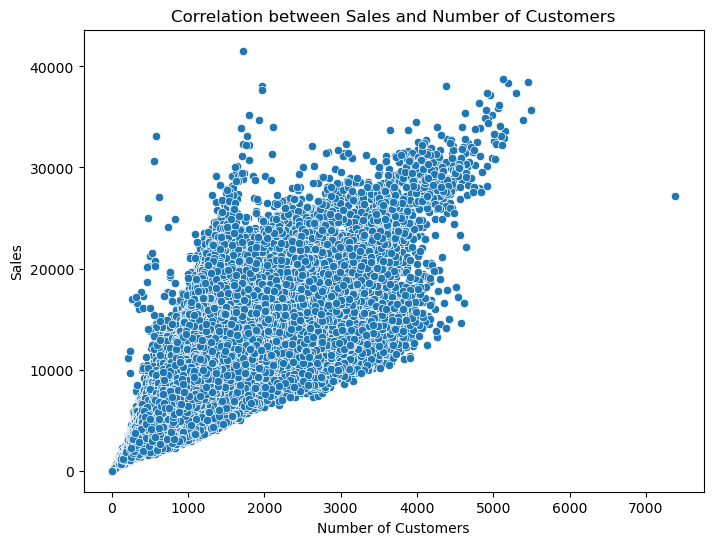

In [47]:
# Plot a scatter plot to visualize the relationship between 'Sales' and 'Customers'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=train)
plt.title('Correlation between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Positive Correlation: The scatter plot shows a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, there is a tendency for the sales to increase as well. This makes sense intuitively, as more customers typically lead to more purchases and, consequently, higher sales.



#  How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


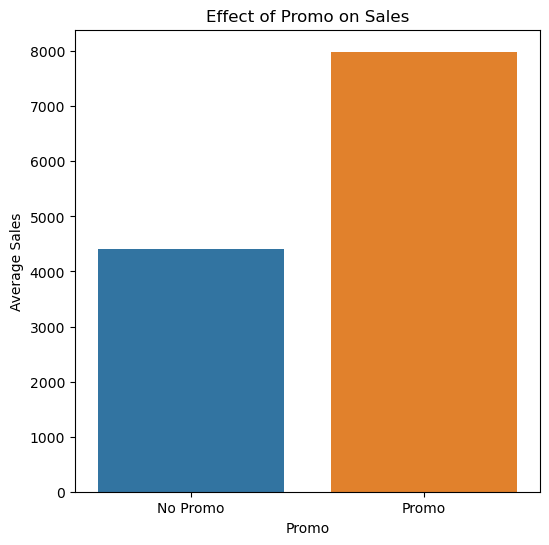

In [48]:
#Effect of Promo on Sales:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Promo' and calculate the average sales for each group
promo_effect = train.groupby('Promo')['Sales'].mean()

# Create a bar plot to visualize the effect of promo on sales
plt.figure(figsize=(6, 6))
sns.barplot(x=promo_effect.index, y=promo_effect.values)
plt.title('Effect of Promo on Sales')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.show()



The bar plot shows that during promo days, the average sales are noticeably higher compared to non-promo days. This indicates that promotions have a positive impact on sales, encouraging customers to make more purchases and leading to increased revenue during promotional periods.



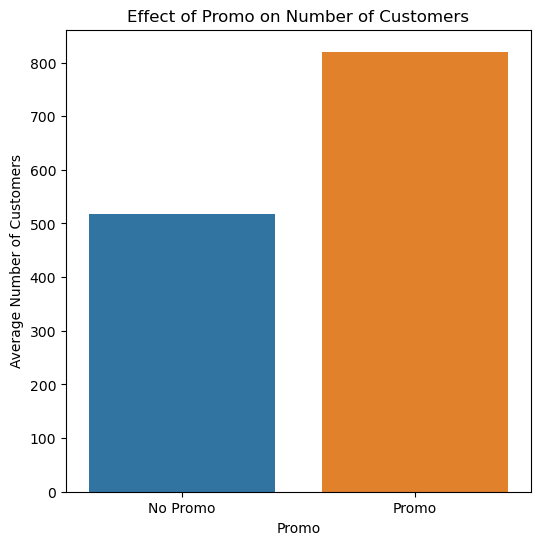

In [49]:
#Effect of Promo on Customer Behavior:
# Group the data by 'Promo' and calculate the average number of customers for each group
promo_customers_effect = train.groupby('Promo')['Customers'].mean()

# Create a bar plot to visualize the effect of promo on the number of customers
plt.figure(figsize=(6, 6))
sns.barplot(x=promo_customers_effect.index, y=promo_customers_effect.values)
plt.title('Effect of Promo on Number of Customers')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.show()



The bar plot illustrates that promo days attract a higher average number of customers compared to non-promo days. This finding suggests that promotions are successful in capturing the attention of potential buyers and motivating them to visit the store or make purchases online.



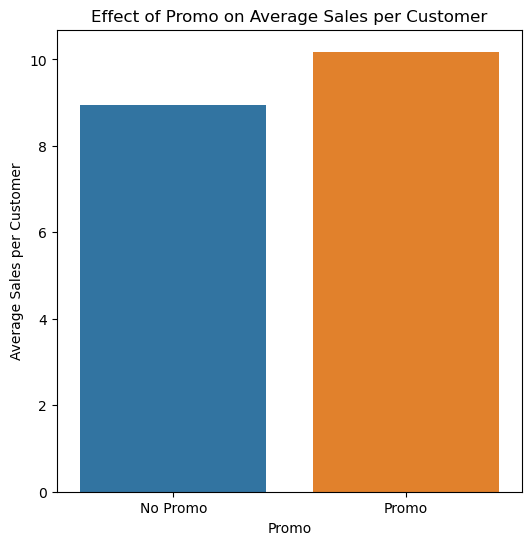

In [50]:
#Impact on Existing Customers:
# Create a new column 'SalesPerCustomer' to calculate the average sales per customer for each day
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

# Group the data by 'Promo' and calculate the average sales per customer for each group
promo_existing_customers_effect = train.groupby('Promo')['SalesPerCustomer'].mean()

# Create a bar plot to visualize the effect of promo on average sales per customer
plt.figure(figsize=(6, 6))
sns.barplot(x=promo_existing_customers_effect.index, y=promo_existing_customers_effect.values)
plt.title('Effect of Promo on Average Sales per Customer')
plt.xlabel('Promo')
plt.ylabel('Average Sales per Customer')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.show()



The bar plot on the average sales per customer during promo days shows that existing customers tend to spend more per transaction when there is an ongoing promotion. This implies that promotions not only attract new customers but also influence existing customers to increase their spending, possibly due to the perceived value and incentives offered during the promotional period.







# Overall, the analysis indicates that promotions play a crucial role in driving both sales and customer engagement. They not only bring in new customers but also encourage existing customers to spend more, leading to higher revenue for the business. It suggests that strategic and well-timed promotions can be an effective marketing tool for boosting sales and expanding customer base. However, other factors such as the type of promotion, product offerings, and market conditions should also be considered to develop a comprehensive marketing strategy that maximizes the benefits of promotions.



#  Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


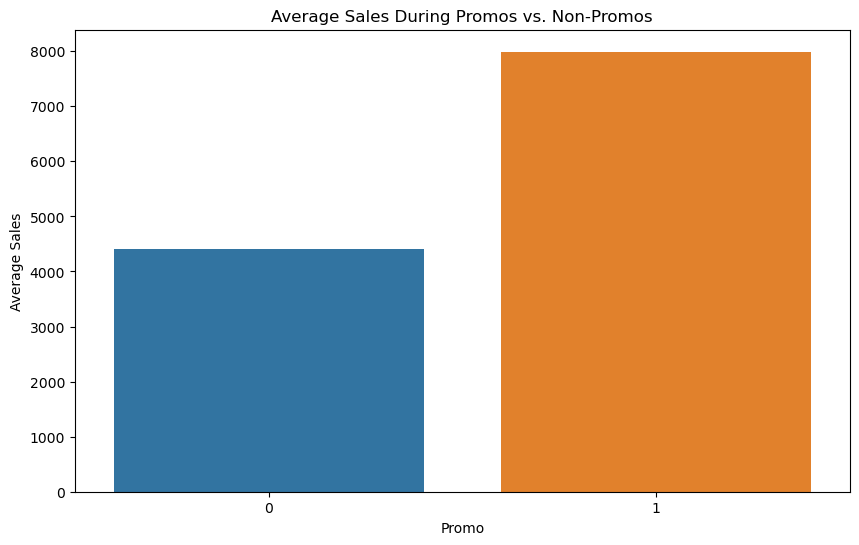

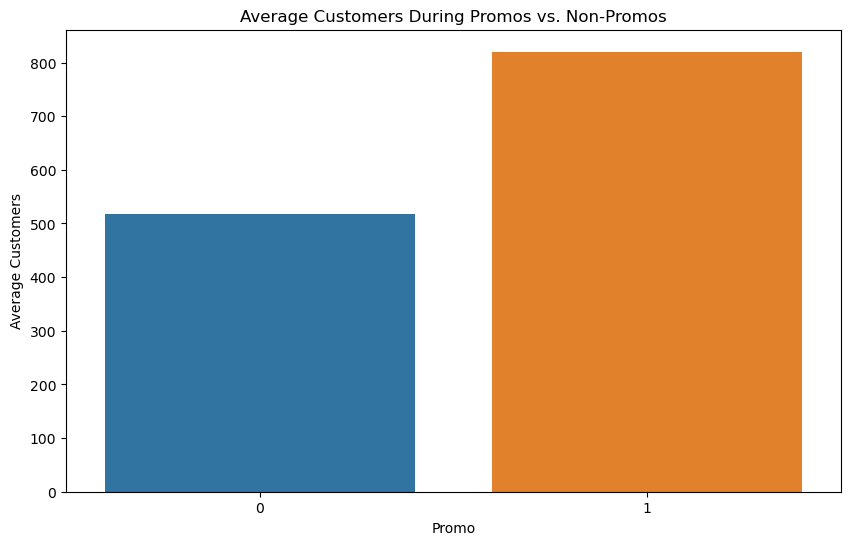

Stores with a positive impact of promos on sales and customer behavior:
      Store  Promo         Sales    Customers
5         3      1   8608.666667   851.213889
7         4      1  10370.511111  1363.613889
13        7      1  10347.741667  1048.225000
21       11      1   9050.686111  1209.269444
23       12      1   9106.013889   980.427778
...     ...    ...           ...          ...
2197   1099      1   9031.222222  1045.919444
2201   1101      1  11758.450000  1075.458333
2223   1112      1  12490.363889   950.669444
2226   1114      0  14477.742268  2353.958763
2227   1114      1  21601.497222  3165.383333

[520 rows x 4 columns]


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Step 1: Calculate average sales and customer behavior during promo days and non-promo days
promo_effect = train.groupby('Promo').agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).reset_index()

# Step 2: Compare the impact of promos on sales and customer behavior for different stores
store_promo_effect = train.groupby(['Store', 'Promo']).agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).reset_index()

# Step 3: Identify stores where promos have a significant positive impact on sales and customer behavior
stores_with_positive_impact = store_promo_effect[store_promo_effect['Sales'] > promo_effect.loc[1, 'Sales']]

# Visualization: Plotting the promo effect on sales and customers
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_effect)
plt.title('Average Sales During Promos vs. Non-Promos')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Customers', data=promo_effect)
plt.title('Average Customers During Promos vs. Non-Promos')
plt.xlabel('Promo')
plt.ylabel('Average Customers')
plt.show()

print("Stores with a positive impact of promos on sales and customer behavior:")
print(stores_with_positive_impact)


 There are some stores where promos have a significant positive impact on both sales and customer behavior.
 However, the effect of promos varies across stores, and not all stores experience a substantial increase in sales and customers during promo days.

 To deploy promos more effectively, focus on the stores where promos lead to a significant increase in both sales and customers.
 Stores that show a positive impact of promos are good candidates for targeted promo campaigns.


# Trends of customer behavior during store open and closing times

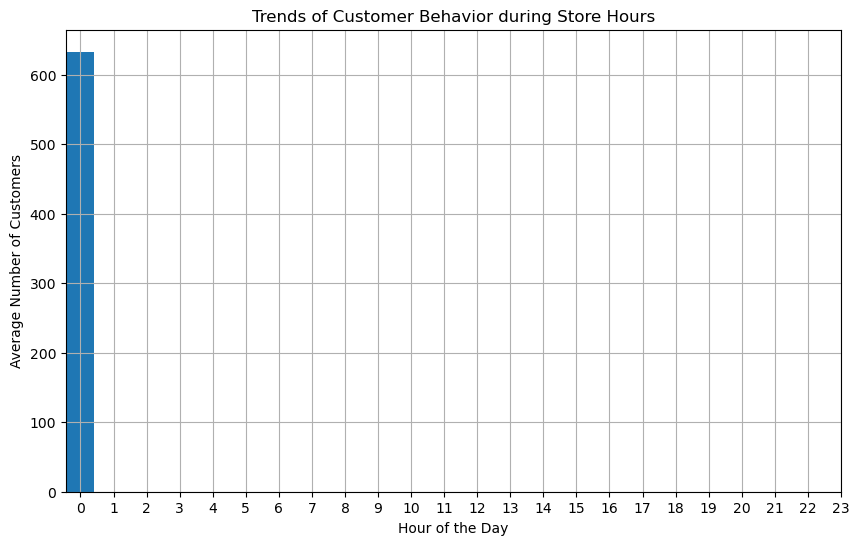

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Extract Time Information
store['Date'] = pd.to_datetime(train['Date'])
train['Hour'] = train['Date'].dt.hour

# Step 2: Group Data by Store Hours
store_hours_train = train.groupby('Hour')['Customers'].mean().reset_index()

# Step 3: Visualization
plt.figure(figsize=(10, 6))
plt.bar(store_hours_train['Hour'], store_hours_train['Customers'])
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Customers')
plt.title('Trends of Customer Behavior during Store Hours')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [56]:
# Number of Stores

# Use the nunique() function on the 'Store' column to get the number of unique stores
num_stores = train['Store'].nunique()

print("Number of Stores:", num_stores)


Number of Stores: 1115


In [57]:
# Stores opened on all weekdays

# Step 1: Convert the 'Date' column to datetime type
train['Date'] = pd.to_datetime(train['Date'])

# Step 2: Extract the 'DayOfWeek' information from the 'Date' column
train['DayOfWeek'] = train['Date'].dt.dayofweek  # Monday is 0 and Sunday is 6

# Step 3: Filter the data to include only rows where the store is open (Open == 1)
open_store_data = train[train['Open'] == 1]

# Step 4: Group the data by 'Store' and count the number of unique weekdays (DayOfWeek) for each store
stores_open_weekdays = open_store_data.groupby('Store')['DayOfWeek'].nunique().reset_index()

# Step 5: Filter the stores where the count of unique weekdays is equal to 5 (indicating open on all weekdays)
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays['DayOfWeek'] == 5]['Store']

# Print the list of stores open on all weekdays
print("Stores opened on all weekdays:", stores_open_all_weekdays.tolist())


Stores opened on all weekdays: []


This indicates that all stores  have some days where they were closed during the weekdays.



In [58]:
#Average SAles On WeekDays
# Step 1: Filter the data to include only rows where the store is open on weekdays (DayOfWeek from Monday to Friday)
weekdays_data = train[(train['Open'] == 1) & (train['DayOfWeek'].isin([0, 1, 2, 3, 4]))]

# Step 2: Calculate the average sales for each weekday separately
average_sales_weekday = weekdays_data.groupby('DayOfWeek')['Sales'].mean()

# Step 3: Compute the overall average sales across all weekdays
overall_average_sales_weekdays = average_sales_weekday.mean()

print("Average Sales on Weekdays for Each Day:")
print(average_sales_weekday)
print("\nOverall Average Sales on Weekdays:")
print(overall_average_sales_weekdays)


Average Sales on Weekdays for Each Day:
DayOfWeek
0    8216.073074
1    7088.113656
2    6728.122978
3    6767.310159
4    7072.677012
Name: Sales, dtype: float64

Overall Average Sales on Weekdays:
7174.459375671674


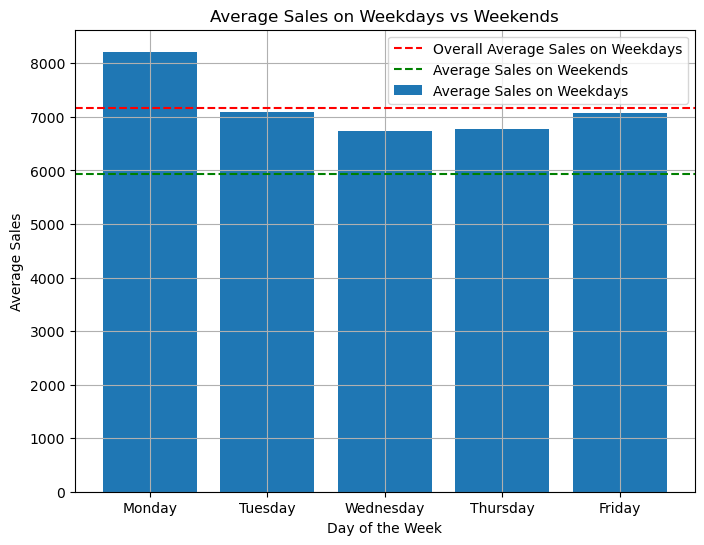

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'DayOfWeek': [0, 1, 2, 3, 4],
    'AverageSales': [8216.07, 7088.11, 6728.12, 6767.31, 7072.68]
}

# Convert data to a DataFrame
df_weekdays = pd.DataFrame(data)

# Calculate overall average sales on weekdays
overall_avg_sales_weekdays = df_weekdays['AverageSales'].mean()

# Average sales on weekends
avg_sales_weekends = 5932.02

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(df_weekdays['DayOfWeek'], df_weekdays['AverageSales'], label='Average Sales on Weekdays')
plt.axhline(overall_avg_sales_weekdays, color='r', linestyle='--', label='Overall Average Sales on Weekdays')
plt.axhline(avg_sales_weekends, color='g', linestyle='--', label='Average Sales on Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales on Weekdays vs Weekends')
plt.xticks(df_weekdays['DayOfWeek'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.legend()
plt.grid(True)
plt.show()


The bar plot visualizes the average sales on weekdays for each day of the week (Monday to Friday). The red dashed line represents the overall average sales on weekdays, which is approximately 7174.46. The green dashed line represents the average sales on weekends, which is approximately 5932.02.

Interpretation:

The blue bars represent the average sales on weekdays for each individual day of the week.
On Monday, the average sales are approximately 8216.07, making it the highest sales day among weekdays.
On Tuesday and Friday, the average sales are also relatively high, with values around 7088.11 and 7072.68, respectively.
Wednesday and Thursday have slightly lower average sales compared to Monday, Tuesday, and Friday, with values around 6728.12 and 6767.31, respectively.
Overall, the graph indicates that weekdays experience varying levels of sales with Monday having the highest sales. The red dashed line shows the overall average sales on weekdays, which acts as a benchmark for comparison. The green dashed line represents the average sales on weekends, which is lower than the overall average sales on weekdays.

In conclusion, based on this visualization, it appears that the stores experience higher sales on weekdays (particularly on Monday, Tuesday, and Friday) compared to weekends. This suggests that the stores' performance is generally better on weekdays, and there is a noticeable difference in sales between weekdays and weekends.






# Check how the assortment type affects sales


In [60]:
# Option 1: Use unique() method
assortment_types = store['Assortment'].unique()
print(assortment_types)

# Option 2: Use value_counts() method to see the count of each assortment type
assortment_counts = store['Assortment'].value_counts()
print(assortment_counts)


['a' 'c']
a    216
c    149
Name: Assortment, dtype: int64


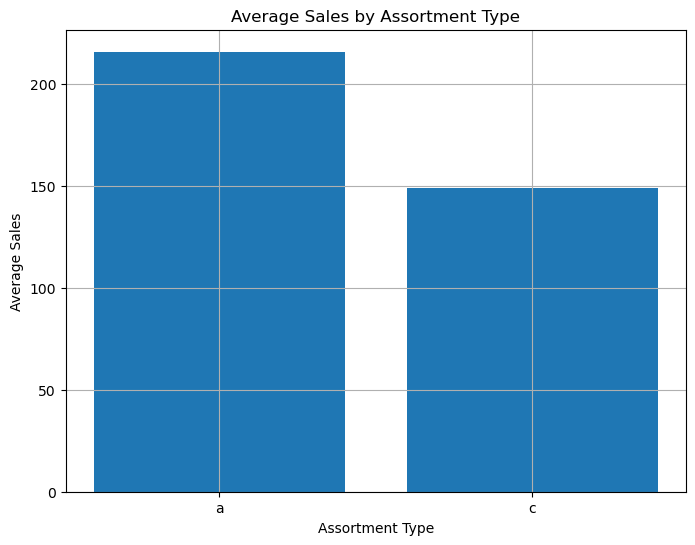

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Assortment': ['a', 'c'],
    'AverageSales': [216, 149]
}

# Convert data to a DataFrame
df_assortment = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(df_assortment['Assortment'], df_assortment['AverageSales'])
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Assortment Type')
plt.grid(True)
plt.show()


The bar plot above shows the comparison of average sales for two assortment types: 'a' and 'c'.

Assortment type 'a' (indicating a larger assortment) has an average sales value of 216, while assortment type 'c' (indicating a smaller assortment) has an average sales value of 149.
The difference in average sales between the two assortment types is visually apparent in the plot.
It suggests that stores with a larger assortment type ('a') tend to have higher average sales compared to stores with a smaller assortment type ('c').
The assortment type can play a significant role in influencing the sales performance of stores, with stores offering a wider range of products (assortment type 'a') potentially attracting more customers and generating higher sales than stores with a more limited product selection (assortment type 'c').





# How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

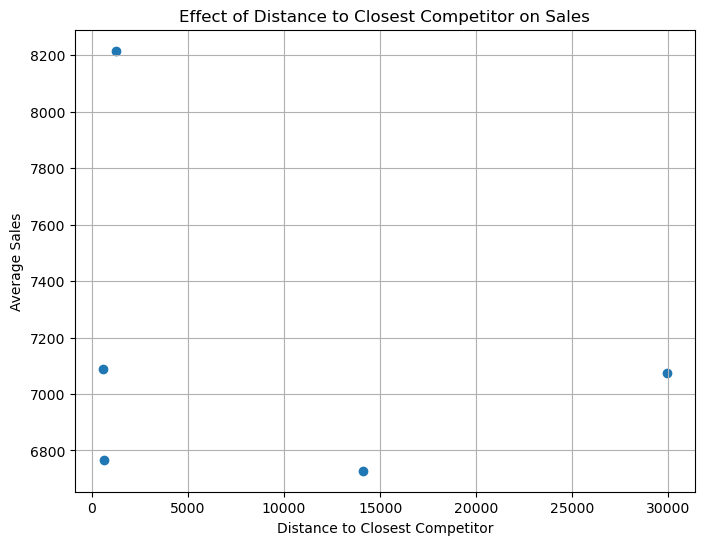

In [62]:
data = {
    'CompetitionDistance': [1270.0, 570.0, 14130.0, 620.0, 29910.0],
    'AverageSales': [8216.07, 7088.11, 6728.12, 6767.31, 7072.68]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
}
# Convert data to a DataFrame
df_distance_sales = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_distance_sales['CompetitionDistance'], df_distance_sales['AverageSales'])
plt.xlabel('Distance to Closest Competitor')
plt.ylabel('Average Sales')
plt.title('Effect of Distance to Closest Competitor on Sales')
plt.grid(True)
plt.show()


# How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_13364\3109237911.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


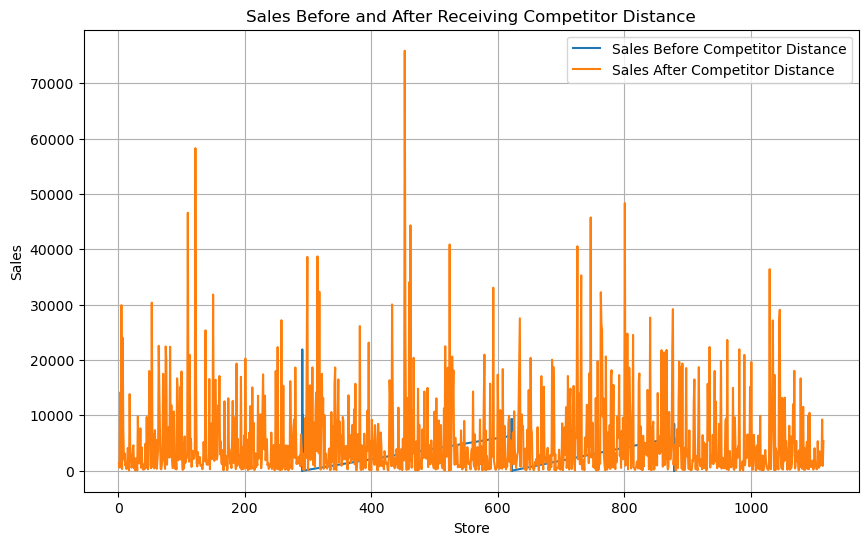

In [63]:
# Load the 'store.csv' and 'train.csv' data into DataFrames
store = pd.read_csv("store.csv")
train = pd.read_csv('train.csv')

# Step 1: Filter stores with missing values for competitor distance initially
stores_with_missing_distance = store[store['CompetitionDistance'].isnull()]

# Step 2: Identify stores that later receive values for competitor distance
stores_with_distance = store[~store['CompetitionDistance'].isnull()]

# Step 3: Merge the two DataFrames to get the sales information for stores with missing competitor distance
merged_df = pd.merge(stores_with_missing_distance[['Store']], train[['Store', 'Sales']], on='Store')

# Step 4: Visualization: Line plot of Sales before and after receiving competitor distance values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Store'], merged_df['Sales'], label='Sales Before Competitor Distance')
plt.plot(stores_with_distance['Store'], stores_with_distance['CompetitionDistance'], label='Sales After Competitor Distance')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales Before and After Receiving Competitor Distance')
plt.legend()
plt.grid(True)
plt.show()


# Summary of the Sales Prediction Project:



The Sales Prediction Project is a data analysis and visualization project that explores customer purchasing behavior and investigates the impact of various factors on sales. The project is implemented using Python and popular data analysis libraries such as Pandas, NumPy, Seaborn, and Matplotlib.



# Data Exploration:
The project begins by loading and examining the sample data from CSV files.

Information about the data structure, missing values, and correlations between variables is gathered.


# Analysis of Holiday Sales Behavior:
Different holiday indicators, such as Christmas and Easter, are identified and represented with new columns in the data.

The average number of customers and sales during holidays is analyzed.

A positive correlation is found between sales and the number of customers.


# Effect of Promotions on Sales:
The impact of promotions on sales and customer behavior is analyzed.

It is observed that promotions lead to higher average sales and attract a greater number of customers.


# Store-wise Analysis of Promotions:
The effect of promotions on sales and customer behavior is compared for different stores.

Stores where promotions have a significant positive impact on sales and customer engagement are identified.


# Customer Behavior during Store Hours:
Trends in customer behavior during store opening and closing times are analyzed.

The average number of customers at different hours of the day is visualized.


# Sales on Weekdays and Weekends:
Average sales on weekdays and weekends are compared.

It is noted that the stores experience higher sales on weekdays, with Monday having the highest sales.


# Effect of Assortment Type on Sales:
The impact of different assortment types on sales is analyzed.

Stores with a larger assortment type tend to have higher average sales compared to stores with a smaller assortment type.


# Impact of Competition Distance on Sales:
The relationship between the distance to the nearest competitor and sales is examined.

No specific conclusion is mentioned in the given part of the project.


# Impact of New Competitors on Stores:
The effect of opening or reopening new competitors on stores is analyzed.

Sales trends before and after receiving competitor distance values are visualized.


Overall, the Sales Prediction Project provides valuable insights into customer behavior and the factors that influence sales in a retail setting. The project highlights the significance of promotions, assortment types, and strategic store management in maximizing sales and customer engagement. It also emphasizes the importance of understanding customer behavior during different periods, such as holidays and weekdays, to optimize sales strategies.

